<b> Definition of model: </b>

The random matrix model is the following.  $X$ will be an $N \times M$ matrix whose entries are constructed as follows.  Given a vector $p = (p_i)_i \in \mathbb{R}^M$ of probabilities $0 < p_i < 1$, we let $B_{ij}$ be an $N \times M$ matrix where each entry $B_{ij}$ is an independent $\mathrm{Binom}(2, p_j)$ random variable.  Then, 
$$
X_{ij} := \frac{1}{ \sqrt{N}} \frac{ B_{ij} - 2 p_j}{ \sqrt{ 2 p_j (1 - p_j ) } }
$$
The vector $p_j$ is constructed as follows.  Given cut-offs $p_0 < p_1$ we consider the PDF,
$$
f(p) = \frac{1}{ Z } \frac{1}{p} \mathbb{1}_{ \{ p_0 <x < p_1 \} }, \quad Z = \log ( p_1) - \log (p_0)
$$
which has $M$-quantiles $\gamma_i$ equalling,
$$
\log (\gamma_j) =Z \frac{j}{N} + \log (p_0).
$$
Then,
$$
p_j = \gamma_j
$$

Below we plot the non-zero eigenvalues of $X X^T$ for various values of $N, M$ and $p_0, p_1$.

<b> Questions about data processing:</b> 

<b>A)</b> How is $p_j$ estimated for each column?  Is it as straightforward as, given a data matrix $\hat{X}$, 
$$
2\hat{p}_j = \frac{1}{N} \sum_{i=1}^N \hat{X}_{ij}
$$
or is it more complicated (perhaps some sort of $\hat{f}(p) \propto \frac{1}{p}$ is fit, and then the $p_j$'s are taken as quantiles from this distribution?)

<b> B) </b> Are columns and/or rows truncated if they are too sparse or via some other procedure?

<b> C) </b> What are the dimensions of the matrix that generated the tapered-edge histogram of eigenvalues from the UK Biobank database? What is the distribution of $\hat{p}_j$ (the sparsity of each column?)?

<b> Summary of numerical experiments appearing below: </b>
1. Investigate dependence on lower sparisty cut-off $p_0$
2. Investigate dependence on aspect ratio $\phi = N/M$
3. Remove columns containing less than some threshold of non-zero entries
4. One specific choice of parameters
5. Change the

<b>1.)</b> First we fix $N = 500$, $M=5000$, $p_0 = \beta / N$ and $p_1 = 0.01$.  We let $\beta = 0.1 \times 2^k$ and see how the histogram changes as the lower cut-off $p_0$ changes (smaller $p_0$ is sparser).  Each histogram represents 100 matrices drawn independently (to reduce the noise and approximate the expected DoS).

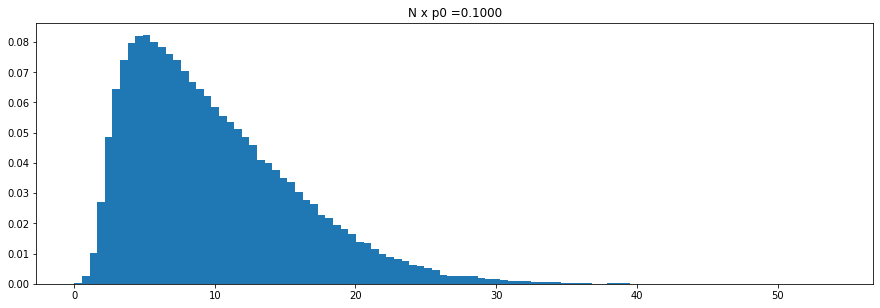

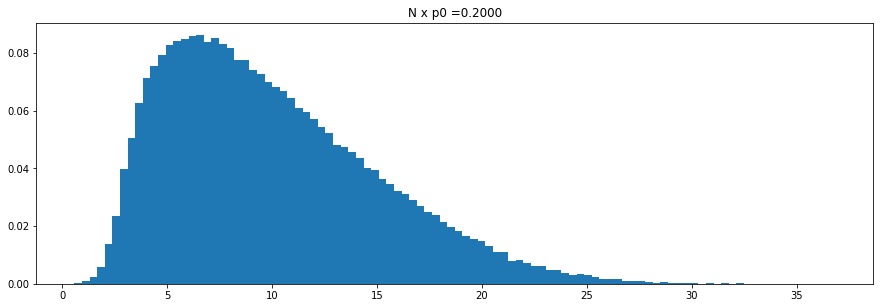

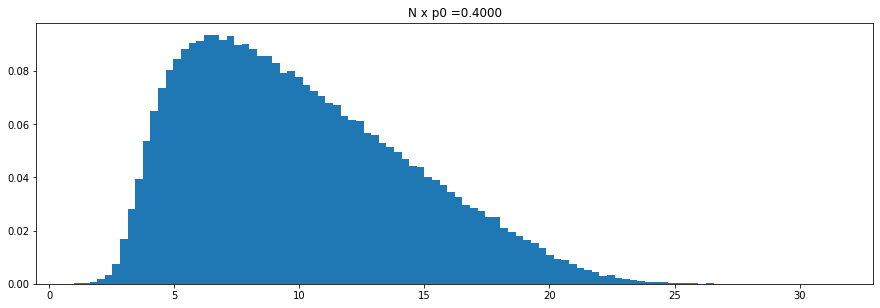

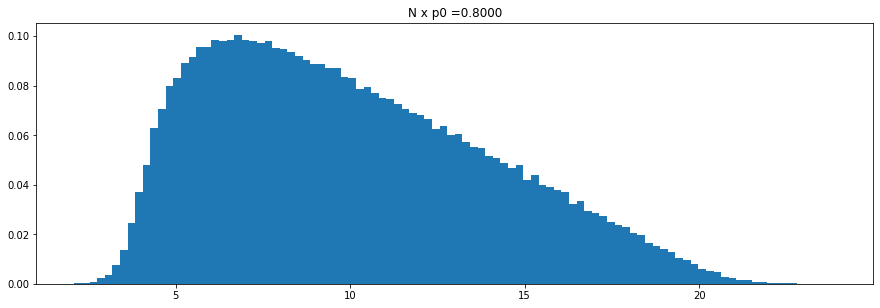

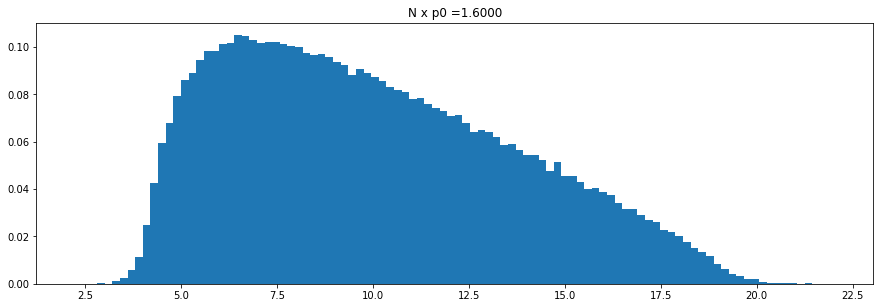

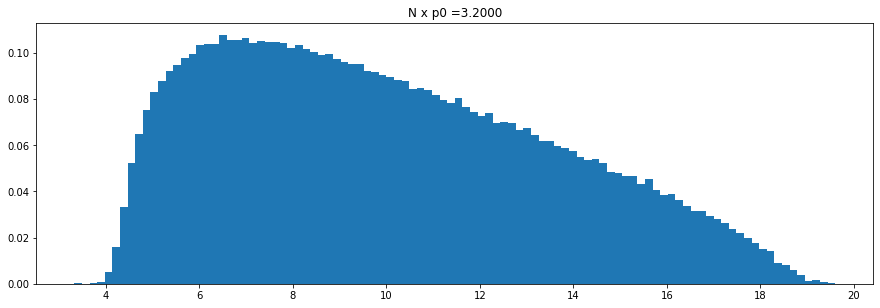

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import main
import imp
imp.reload(main)

N = 500
M = 5000
p1 = 0.01
pVals = 0.1*np.power(2.0, np.arange(6)) / N

for k in range(6):
    p0 = pVals[k]
    S = main.power(N, M, p0, p1=p1)
    for i in range(99):
        S = np.append(S, main.power(N, M, p0, p1=p1))
    fig, ax = plt.subplots(figsize=(15,4.8))
    ax.hist(S, bins=100, density=True)
    ax.set_title('N x p0 ='+'{:.4f}'.format(N*p0))
    plt.show()

<b> 1 continued)</b> larger range of $p_0$:

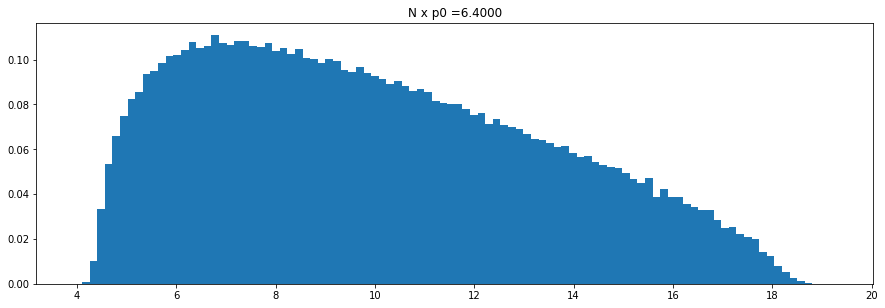

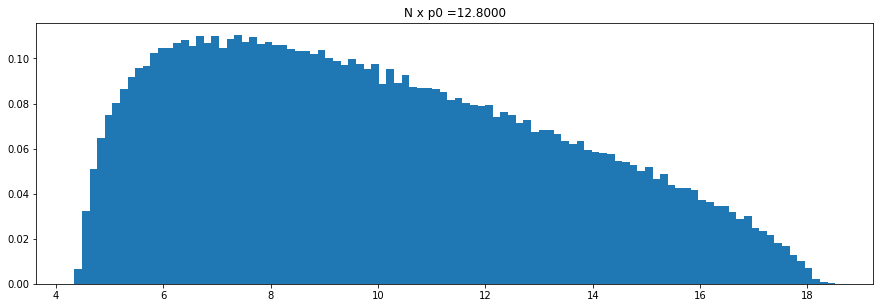

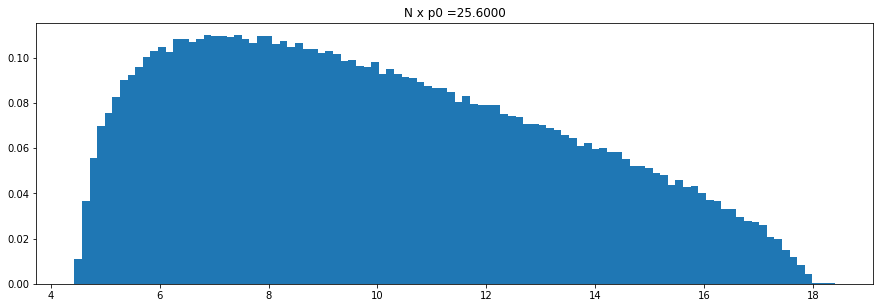

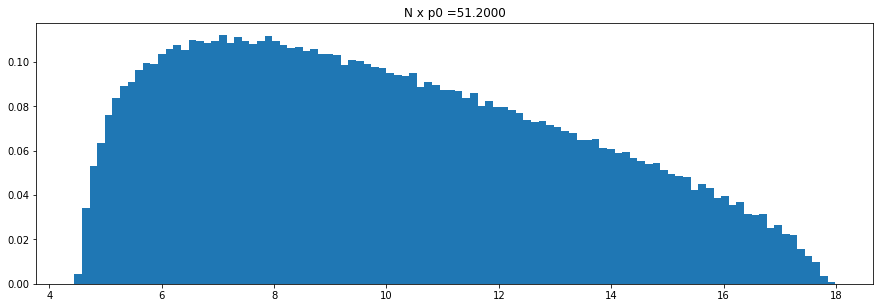

In [4]:
pVals = 0.1*np.power(2.0, np.arange(20)) / N
for k in range(6, 10):
    p0 = pVals[k]
    S = main.power(N, M, p0, p1=p1)
    for i in range(99):
        S = np.append(S, main.power(N, M, p0, p1=p1))
    fig, ax = plt.subplots(figsize=(15,4.8))
    ax.hist(S, bins=100, density=True)
    ax.set_title('N x p0 ='+'{:.4f}'.format(N*p0))
    plt.show()

<b>2.)</b> We fix $N=500$, $p_0 = 0.8/N$ and let $M = 2^k * 5000$ to investigate how the histogram changes when the aspect ratio $\phi = M /N$ changes.

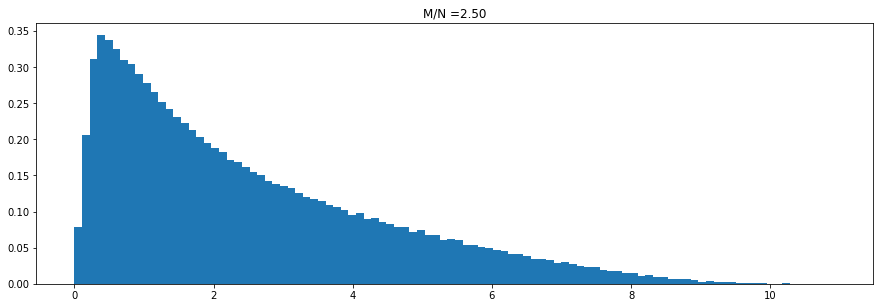

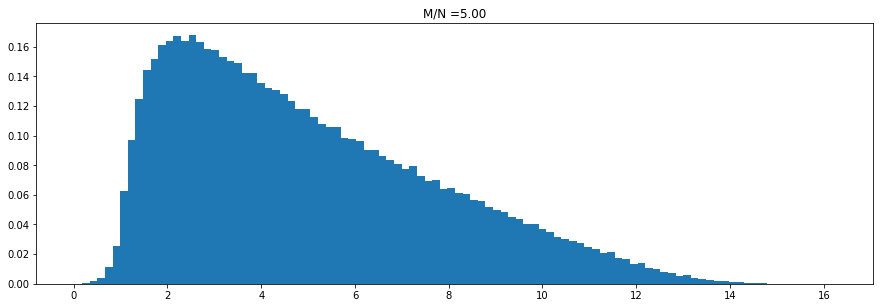

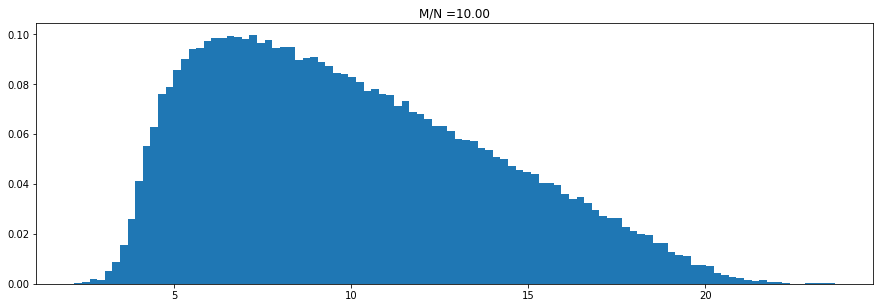

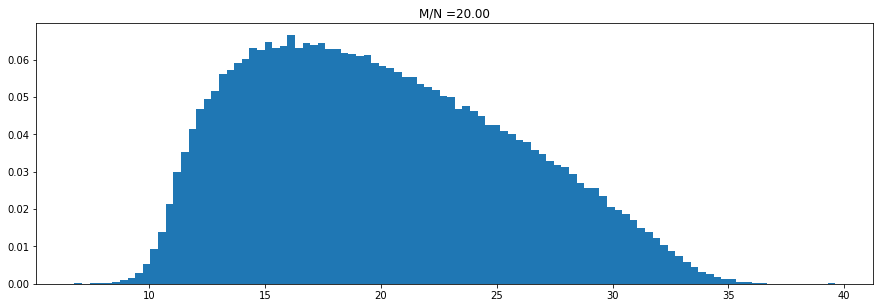

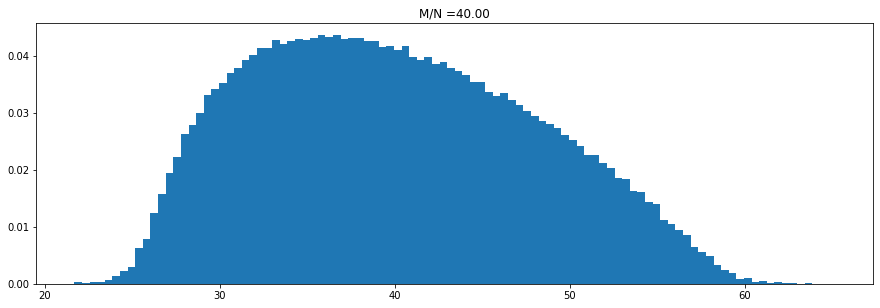

In [7]:
N = 500
p0 = 0.8/N
p1 = 0.01
Mvals = (np.power(2.0, np.arange(-2, 3))*5000).astype(int)
for k in range(len(Mvals)):
    M = Mvals[k]
    S = main.power(N, M, p0, p1=p1)
    for i in range(99):
        S = np.append(S, main.power(N, M, p0, p1=p1))
    fig, ax = plt.subplots(figsize=(15,4.8))
    ax.hist(S, bins=100, density=True)
    ax.set_title('M/N ='+'{:.2f}'.format(M/N))
    plt.show()

<b>3.)</b> We investigate the effect of removing columns that have small amounts of non-zero entries.  $N = 500$, $M=5000$, $p0 = 0.8/N$ and $p1 = 0.01$.

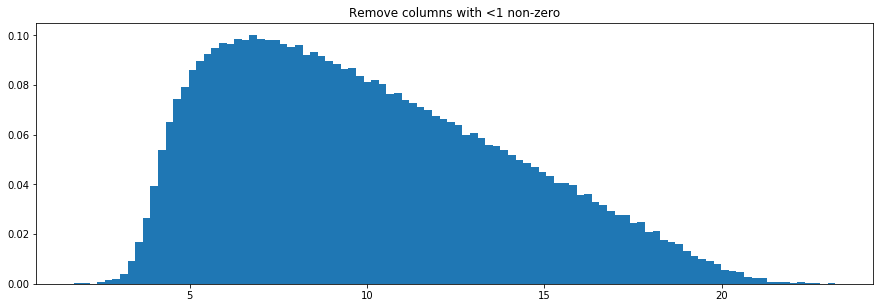

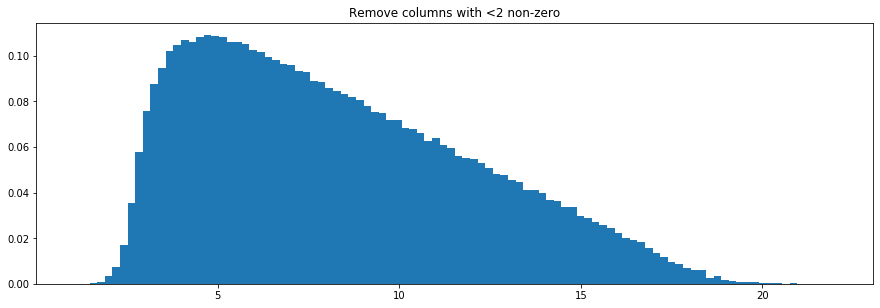

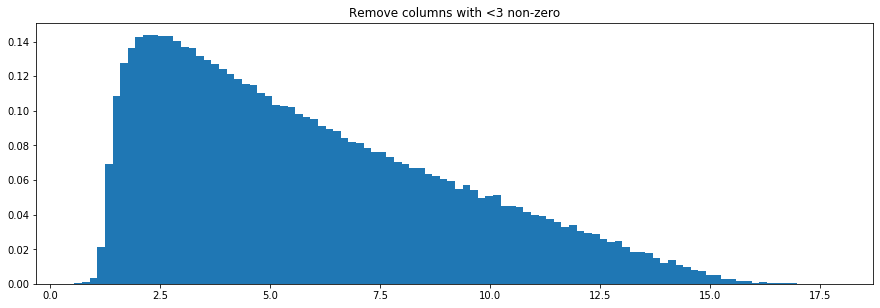

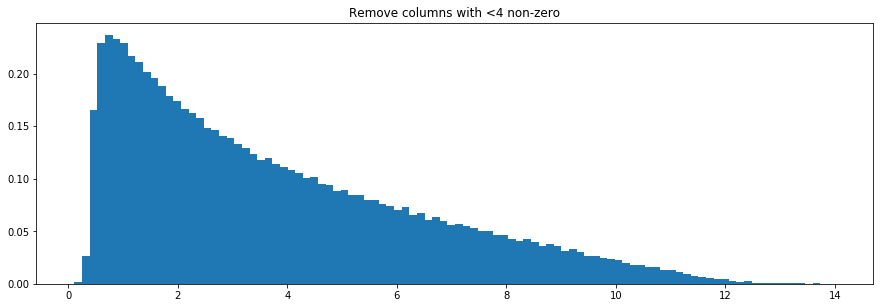

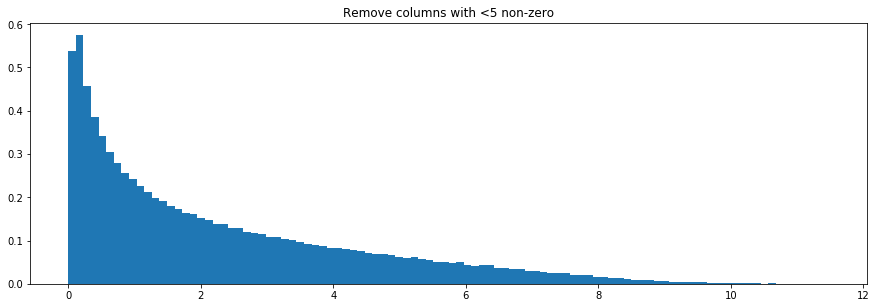

In [10]:
imp.reload(main)
N = 500
M = 5000
p0 = 0.8/N
p1 = 0.01
for k in range(1, 6):
    S = main.power(N, M, p0, p1=p1, k=k)
    for i in range(99):
        S = np.append(S, main.power(N, M, p0, p1=p1, k=k))
    fig, ax = plt.subplots(figsize=(15,4.8))
    ax.hist(S, bins=100, density=True)
    titl = 'Remove columns with <'+str(k)+' non-zero'
    ax.set_title(titl)
    plt.show()

<b>4.)</b> One-off experiment of $M =15000$ and $N=500$, $p_0 = 0.8/N$ and $p_1 = 0.01$.  Truncate columns with $<4$ non-zero entries (wanted to investigate the combination of truncations but larger aspect ratio).

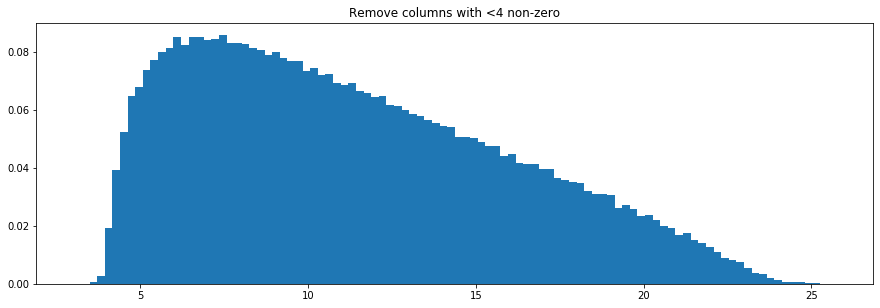

In [12]:
k=4
M=15000
S = main.power(N, M, p0, p1=p1, k=k)
for i in range(99):
    S = np.append(S, main.power(N, M, p0, p1=p1, k=k))
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
titl = 'Remove columns with <'+str(k)+' non-zero'
ax.set_title(titl)
plt.show()

<b>5.)</b> Investigate the behavior with changing $p_1$, the right cut-off.  We take $M=5000$, $N=500$, $p_0 = 0.8/N$ and $p_1 = 2^{k} \times 0.01$, $-1  \leq k \leq 5 $.

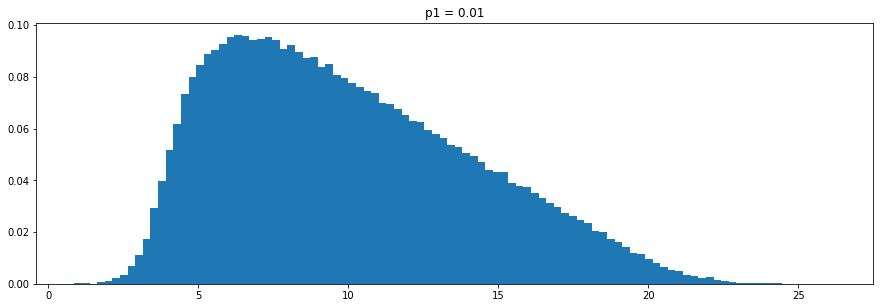

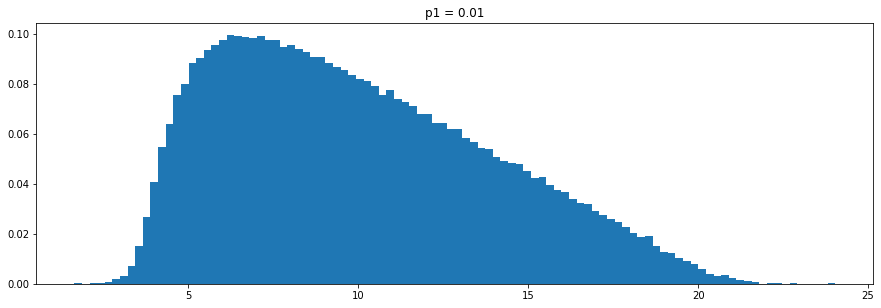

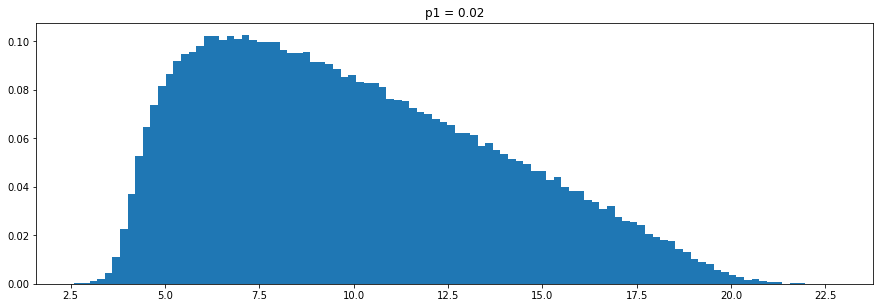

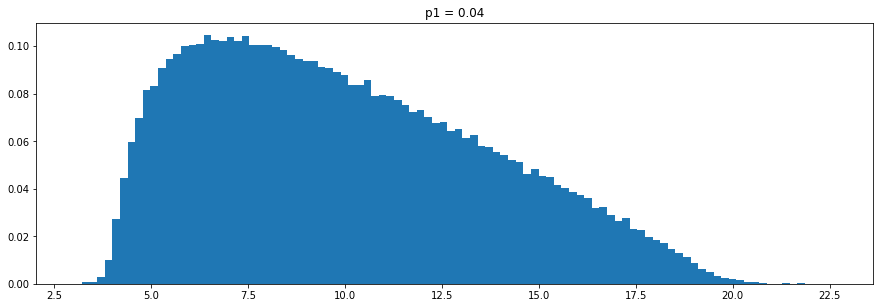

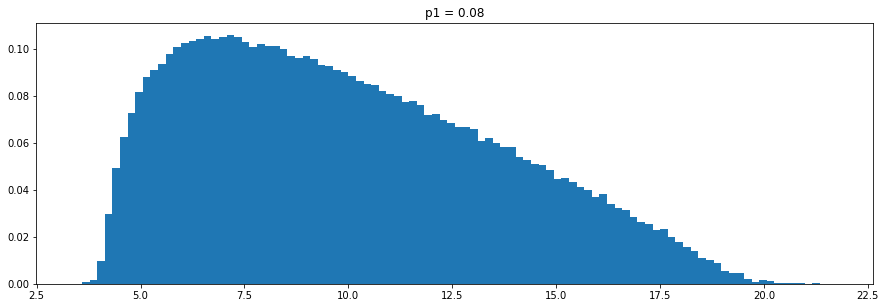

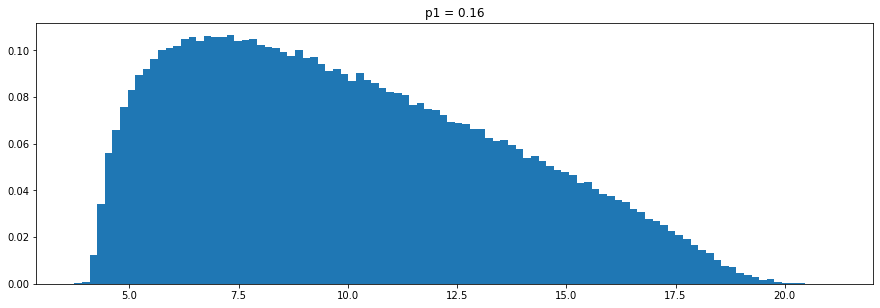

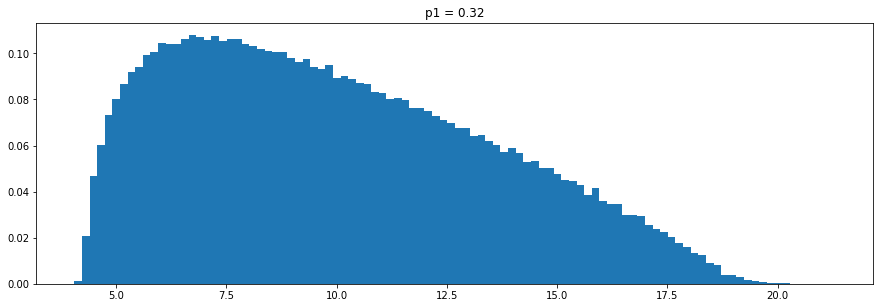

In [14]:
N = 500
M = 5000
p0 = 0.8/N
pVals = np.power(2.0, np.arange(-1, 6))*0.01
for k in range(len(pVals)):
    p1 = pVals[k]
    S = main.power(N, M, p0, p1=p1)
    for i in range(99):
        S = np.append(S, main.power(N, M, p0, p1=p1))
    fig, ax = plt.subplots(figsize=(15,4.8))
    ax.hist(S, bins=100, density=True)
    titl = 'p1 = '+'{:.4f}'.format(p1)
    ax.set_title(titl)
    plt.show()

<b> 6.)</b>  We try $M=30000$, $N=500$, $p_0 = 0.01/N$, $p_1 =0.25$.

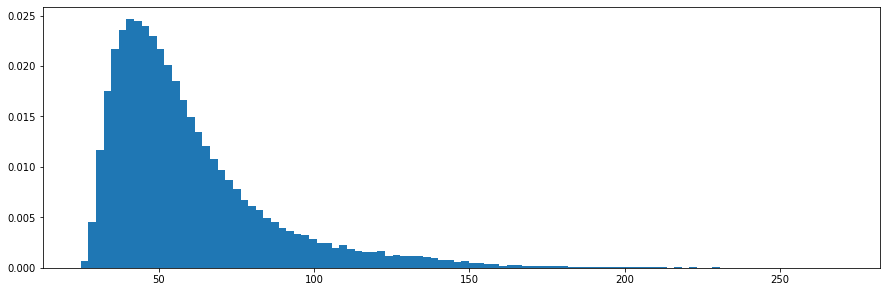

In [18]:
M = 30000
N = 500
p0 = 0.01/N
p1 = 0.25
S = main.power(N, M, p0, p1=p1)
for i in range(99):
    S = np.append(S, main.power(N, M, p0, p1=p1))
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
plt.show()

<b> 7.)</b>  We try $M=30000$, $N=500$, $p_0 = 0.05/N$, $p_1 =0.25$.

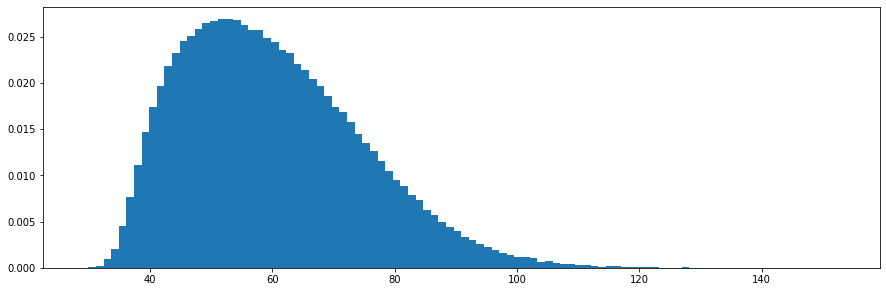

In [19]:
M = 30000
N = 500
p0 = 0.05/N
p1 = 0.25
S = main.power(N, M, p0, p1=p1)
for i in range(199):
    S = np.append(S, main.power(N, M, p0, p1=p1))
fig, ax = plt.subplots(figsize=(15,4.8))
ax.hist(S, bins=100, density=True)
plt.show()